In [1]:
import pandas as pd
import numpy as np

In [2]:
h1 = pd.read_csv('C:\\Users\\Glavatskih-DE\\Downloads\\PY_kurs\\CSV\\hotels.csv')
h1.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [3]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [4]:
h1[h1.duplicated(subset=h1.columns)].shape[0]



307

Дубликаты найдены, удаляем их

In [5]:
h1 = h1.drop_duplicates()

удаляем также строки с пропусками в полях lat и lng. В других полях нет пустых значений

In [6]:
h1 = h1.dropna(axis=0, how='all', subset=['lat','lng'])

преобразуем строковую дату к типу datetime

In [7]:
h1['review_date'] =  pd.to_datetime(h1['review_date'], format='%m/%d/%Y')

In [176]:
#h1[h1.hotel_name == '11 Cadogan Gardens'].sort_values(by = ['review_date'])

In [177]:
#from geopy.geocoders import Nominatim

#geoloc = Nominatim(user_agent="geoapiExercises")

#def get_country(lat1, lon1):
#    if lat1:
#        loc1 = geoloc.reverse(str(lat1)+","+str(lon1))
#        return loc1.raw['address']['country']
#    return ''



In [178]:
#h1['country'] = h1.apply(lambda x: get_country(x['lat'], x['lng']), axis=1)

In [179]:
#h1[h1.hotel_name == '45 Park Lane Dorchester Collection'].sort_values(by = ['review_date'])[['review_date','days_since_review','reviewer_score']]

пишем функцию, которая находит в заданной строке тэг с кол-вом ночей и возвращает это кол-во

In [8]:
import re

def get_nights( s1 ):
    mt1 = re.search(r'Stayed \d+ night', s1)
    if mt1:
        return int(mt1[0].split()[1])
    return np.NAN


создали новое поле Nights с кол-вом проведенных ночей, используя только что созданную функцию

In [9]:
#h1 = h1.drop('Nights', axis=1)

h1['Nights'] = h1.tags.apply(get_nights)

#get_nday(' Stayed  nights ')



In [10]:
h1[h1['Nights'].isnull()].shape[0]

145

удаляем строки с пустыми значениями в поле Nights

In [11]:
h1.dropna(axis=0, how='all', subset=['Nights'], inplace=True)

In [12]:
h1[pd.isna(h1.tags)]

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,Nights


создали поле month, выделив месяц из поля review_date. Предполагаем, что на оценку отеля может повлиять сезон, а месяц этот сезон и определяет

In [13]:
h1['month'] = h1.review_date.dt.month

#h1[['tags','Nights']].head(20)

In [14]:
h1.info()
#h1.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383903 entries, 0 to 386802
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               383903 non-null  object        
 1   additional_number_of_scoring                383903 non-null  int64         
 2   review_date                                 383903 non-null  datetime64[ns]
 3   average_score                               383903 non-null  float64       
 4   hotel_name                                  383903 non-null  object        
 5   reviewer_nationality                        383903 non-null  object        
 6   negative_review                             383903 non-null  object        
 7   review_total_negative_word_counts           383903 non-null  int64         
 8   total_number_of_reviews                     383903 non-null  int64        

In [15]:
h1 = h1.reindex(index=range(0,h1.shape[0]), method='pad')

смотрим распределение поля страна рецензента

In [16]:
h1.reviewer_nationality.value_counts(True)

 United Kingdom                    0.477248
 United States of America          0.068496
 Australia                         0.042039
 Ireland                           0.028854
 United Arab Emirates              0.019711
                                     ...   
 Tuvalu                            0.000003
 Bonaire St Eustatius and Saba     0.000003
 Guinea                            0.000003
 Cook Islands                      0.000003
 Grenada                           0.000003
Name: reviewer_nationality, Length: 225, dtype: float64

In [189]:
#nat1 = h1.reviewer_nationality.value_counts(True).head(15)

In [190]:
# h1.reviewer_nationality = h1.reviewer_nationality.apply(lambda x: x if x in nat1.index else 'other')

In [192]:
#h1 = pd.get_dummies(h1, columns=['reviewer_nationality'])

У нас 225 стран, поэтому новые признаки для них попробуем создать с помощью бинарного кодировщика

In [ ]:
import category_encoders as ce # импорт для работы с кодировщиком

bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования

nationals = bin_encoder.fit_transform( h1['reviewer_nationality'] )
h1 = pd.concat([h1, nationals], axis=1)


#h1.reviewer_nationality.value_counts(True).head(20)

ДОБАВЛЕНИЕ НОВЫХ ПРИЗНАКОВ НА ОСНОВЕ ТЭГОВ

In [19]:
from ast import literal_eval

#  Функция возвращает кол-во тэгов в строке t1
def get_tags_cnt( t1 ):
    m2 = literal_eval( t1 )
    return len(m2)


In [195]:
#h1.tags.apply( get_tags_cnt )

создаем поле tags_cnt с кол-вом тэгов в текущей строке

In [20]:
h1['tags_cnt'] = h1.tags.apply( get_tags_cnt )


Формируем массив m1, содержащий все тэги из набора данных

In [21]:
from ast import literal_eval
# m0 = []
m1 = []

for i1 in range(0, h1.shape[0]):
    m2 = literal_eval(h1.loc[i1,'tags'])
    
    m1.extend(m2)
    # m0.extend([m2])
    #print(m2)
m1

[' Leisure trip ',
 ' Couple ',
 ' Studio Suite ',
 ' Stayed 2 nights ',
 ' Submitted from a mobile device ',
 ' Business trip ',
 ' Couple ',
 ' Standard Double Room ',
 ' Stayed 1 night ',
 ' Leisure trip ',
 ' Solo traveler ',
 ' Modern Double Room Echo ',
 ' Stayed 3 nights ',
 ' Submitted from a mobile device ',
 ' Leisure trip ',
 ' Solo traveler ',
 ' Standard Room with 1 Double Bed ',
 ' Stayed 1 night ',
 ' Business trip ',
 ' Couple ',
 ' Standard Double or Twin Room ',
 ' Stayed 6 nights ',
 ' Business trip ',
 ' Solo traveler ',
 ' Superior Twin Room ',
 ' Stayed 1 night ',
 ' Submitted from a mobile device ',
 ' Leisure trip ',
 ' Couple ',
 ' Double Room Non Smoking ',
 ' Stayed 1 night ',
 ' Submitted from a mobile device ',
 ' Leisure trip ',
 ' Couple ',
 ' Superior Double Room ',
 ' Stayed 4 nights ',
 ' Leisure trip ',
 ' Couple ',
 ' Double Room ',
 ' Stayed 1 night ',
 ' Leisure trip ',
 ' Couple ',
 ' Twin Hilton Guest Room ',
 ' Stayed 1 night ',
 ' Submitted fro

преобразуем массив m1 в датафрэйм df1

In [22]:
df1 = pd.DataFrame(m1, columns=['tag'])

удаляем из df1 элементы с информацией о кол-ве ночей (для них у нас уже есть ранее заполненное поле Nights)

In [23]:
df1 = df1[df1.tag.str.count(' Stayed ') == 0]

Группируем датафрэйм по названию тэгов и выделяем из них 15 наиболее часто используемых

In [24]:
#df1.groupby('tag')['tag'].agg(['count'])
df2 = df1.groupby('tag')['tag'].count()
df2.shape[0]

2314

In [25]:
df2 = df2.sort_values().tail(15)
df2

tag
 Classic Double Room                 12607
 Standard Double or Twin Room        13071
 Double or Twin Room                 16627
 Deluxe Double Room                  18585
 Family with older children          19648
 Superior Double Room                23357
 Standard Double Room                23825
 Double Room                         26336
 Family with young children          45523
 Group                               48667
 Business trip                       61515
 Solo traveler                       80607
 Couple                             187845
 Submitted from a mobile device     229263
 Leisure trip                       311247
Name: tag, dtype: int64

Создаем бинарные поля для 15-и наиболее часто используемых тэгов

In [26]:
for in1 in df2.index:
    col1 = in1.strip()
    str1 = "'" + in1 + "'"
    h1[col1] = h1.tags.str.count(str1)
    #print(str1)

анализируем все небинарные числовые поля (вкл.целевое поле reviewer_score)

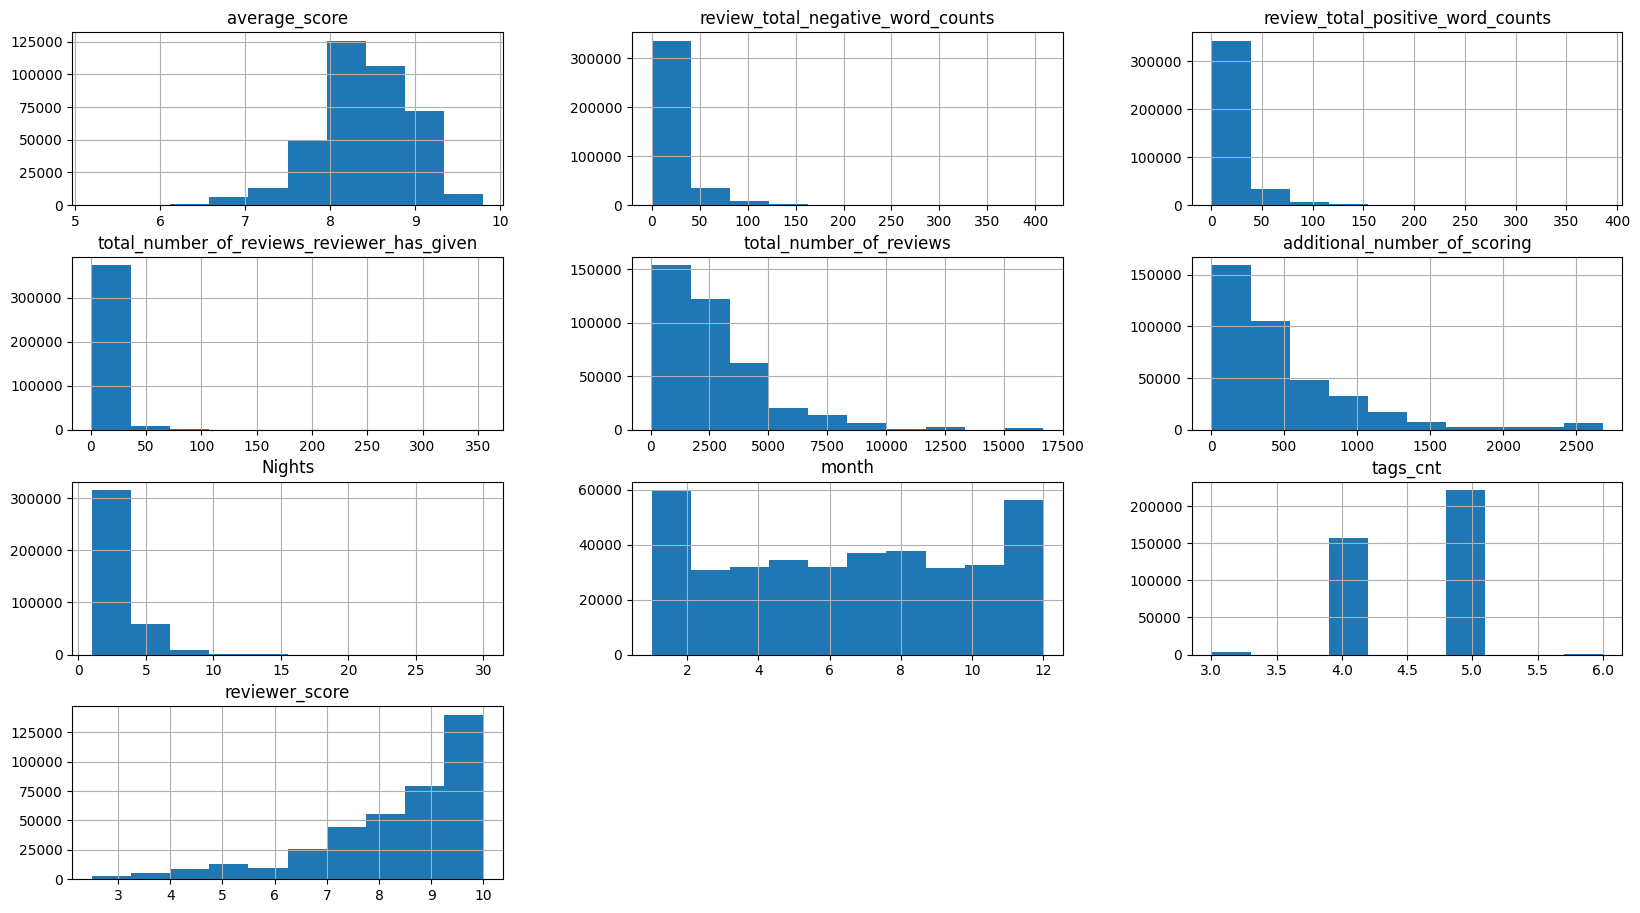

In [27]:
cols = ['average_score','review_total_negative_word_counts','review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given','total_number_of_reviews', 'additional_number_of_scoring',
        'Nights','month', 'tags_cnt', 'reviewer_score' ]
h1[cols].hist(figsize=(20, 11));


#h1 = h1.drop_duplicates()
#h1[h1.duplicated(subset=h1.columns)]

Видим, что близко к нормальному распределено только поле average_score. Также видно что почти все поля имеют довольно длинные "хвосты"

Далее анализируем поле Nights 

<AxesSubplot: >

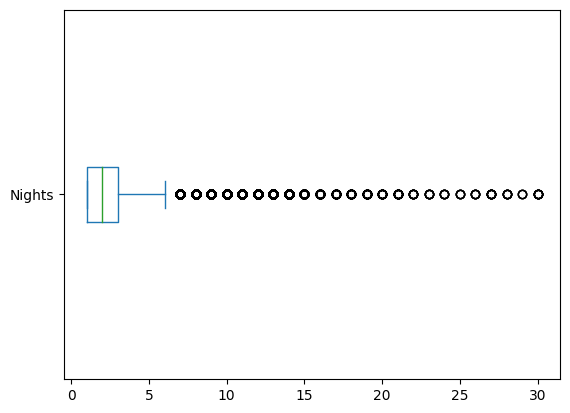

In [28]:
h1['Nights'].plot(kind="box", vert=False)

принимаем решение считать выбросами все значения > 10

In [29]:
h1 = h1.drop( h1[h1['Nights'] > 10].index )
#h10 = pd.get_dummies(h1, columns=['reviewer_nationality'])


Данные в поле average_score распределены более-менее нормально, поэтому для определения выбросов можем использовать метод межквартильного размаха

In [30]:
def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    # x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    
    print(f'Границы диапазона: {lower_bound}, {upper_bound}')
    
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

Левую границу берем чуть больше стандарта (2 вместо 1.5) т.к. слева распределение имеет более длинный хвост

In [31]:
out1, h1 = outliers_iqr(h1, 'average_score', left=2.0, right=1.5)

Границы диапазона: 6.6999999999999975, 9.850000000000001


Определяем границы выбросов по всем числовым полям

In [32]:
h1.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,Nights,...,Superior Double Room,Standard Double Room,Double Room,Family with young children,Group,Business trip,Solo traveler,Couple,Submitted from a mobile device,Leisure trip
count,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,...,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000,381538.000000
mean,501.184600,8.404651,18.481111,2751.973644,17.795349,7.167435,8.406403,49.436443,2.830905,2.323818,...,0.061056,0.061871,0.067907,0.118389,0.126949,0.159504,0.208957,0.490449,0.597285,0.811749
std,501.544937,0.538043,29.606363,2324.037825,21.724633,11.045948,1.628062,3.471908,4.583484,1.506805,...,0.239432,0.240921,0.251586,0.323069,0.332917,0.366146,0.406564,0.499909,0.490445,0.390913
min,1.000000,6.700000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214277,-0.143372,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,345.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.019886,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,666.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.834443,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2682.000000,9.800000,408.000000,16670.000000,386.000000,355.000000,10.000000,52.400181,16.429233,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Удаляем выбросы

In [34]:
#h1[h1['review_total_negative_word_counts'] > 150].count()  # - 3252

h1 = h1.drop( h1[h1['review_total_negative_word_counts'] > 150].index )


In [35]:
#h1[h1['review_total_positive_word_counts'] > 150].count()  # - 1210

h1 = h1.drop( h1[h1['review_total_positive_word_counts'] > 150].index )


In [36]:
#h1[h1['total_number_of_reviews_reviewer_has_given'] > 50].count()  # - 4181

h1 = h1.drop( h1[h1['total_number_of_reviews_reviewer_has_given'] > 50].index )

In [37]:
#h1[h1['total_number_of_reviews'] > 10000].count()  # - 5181

h1 = h1.drop( h1[h1['total_number_of_reviews'] > 10000].index )

In [38]:
#h1[h1['additional_number_of_scoring'] > 2000].count()  # - 6643

h1 = h1.drop( h1[h1['additional_number_of_scoring'] > 2000].index )

In [39]:
# h1[h1.tags_cnt > 5].count()

h1 = h1.drop( h1[h1.tags_cnt > 5].index )

Смотрим что получилось после удаления выбросов

In [40]:
h1.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,Nights,...,Superior Double Room,Standard Double Room,Double Room,Family with young children,Group,Business trip,Solo traveler,Couple,Submitted from a mobile device,Leisure trip
count,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,...,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000,360661.000000
mean,446.650012,8.419136,16.622887,2484.649715,17.196664,6.437499,8.443696,49.412109,2.852517,2.335234,...,0.062078,0.060348,0.066117,0.118019,0.127990,0.156183,0.205470,0.492917,0.601446,0.815062
std,381.534058,0.529439,22.351425,1759.575798,18.706578,8.041168,1.600957,3.497777,4.593787,1.509649,...,0.241297,0.238130,0.248488,0.322632,0.334079,0.363029,0.404045,0.499951,0.489601,0.388248
min,1.000000,6.700000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,8.100000,0.000000,1131.000000,5.000000,1.000000,7.500000,48.214066,-0.145279,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,333.000000,8.400000,9.000000,2037.000000,11.000000,3.000000,8.800000,51.499279,0.038657,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,620.000000,8.800000,23.000000,3469.000000,22.000000,8.000000,9.600000,51.516843,4.834443,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1936.000000,9.800000,150.000000,8177.000000,150.000000,50.000000,10.000000,52.400181,16.429233,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
h1 = h1.reindex(index=range(0,h1.shape[0]), method='pad')

ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ

In [42]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()

Поле average_score распределено более-менее нормально, поэтому для него выполняем стандартитзацию, а не нормализацию

In [43]:
as1 = s_scaler.fit_transform( h1[['average_score']] )
as1 = pd.DataFrame(as1, columns=['average_score'] )

In [44]:
h1 = h1.drop('average_score', axis=1)
h1 = pd.concat([h1, as1], axis=1)

Для всех прочих числовых (но не бинарных) признаков выполняем нормализацию, причем используем метод RobustScaler, т.к. он менее чувствителен к выбросам

In [45]:
r_scaler = preprocessing.RobustScaler()
col_names = ['review_total_negative_word_counts','review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given','total_number_of_reviews', 'additional_number_of_scoring',
        'Nights','month', 'tags_cnt' ]

h2 = r_scaler.fit_transform(h1[col_names])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
h2 = pd.DataFrame(h2, columns=col_names)


In [46]:
h1 = h1.drop(col_names, axis=1)

h1 = pd.concat([h1, h2], axis=1)

Смотрим что получилось после преобразования признаков.

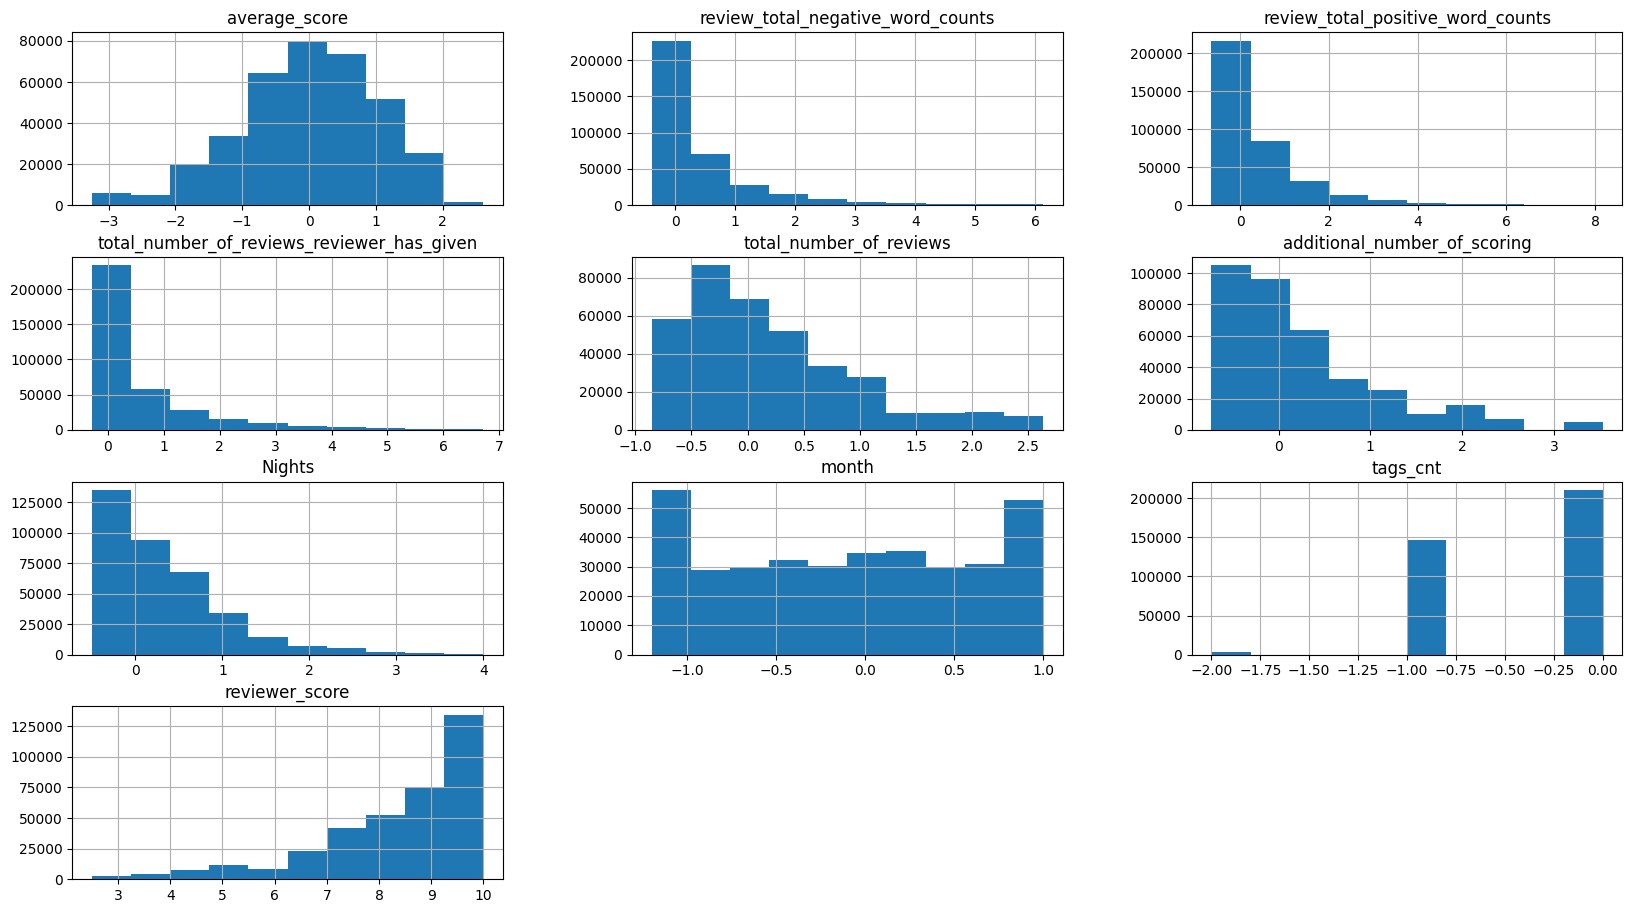

In [47]:
cols = ['average_score','review_total_negative_word_counts','review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given','total_number_of_reviews', 'additional_number_of_scoring',
        'Nights','month', 'tags_cnt', 'reviewer_score' ]
h1[cols].hist(figsize=(20, 11));

In [48]:
h1[pd.isna(h1.tags)]

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,reviewer_score,tags,days_since_review,lat,...,Leisure trip,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,total_number_of_reviews,additional_number_of_scoring,Nights,month,tags_cnt


In [49]:
h1.columns

Index(['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'positive_review', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng', 'reviewer_nationality_0',
       'reviewer_nationality_1', 'reviewer_nationality_2',
       'reviewer_nationality_3', 'reviewer_nationality_4',
       'reviewer_nationality_5', 'reviewer_nationality_6',
       'reviewer_nationality_7', 'Classic Double Room',
       'Standard Double or Twin Room', 'Double or Twin Room',
       'Deluxe Double Room', 'Family with older children',
       'Superior Double Room', 'Standard Double Room', 'Double Room',
       'Family with young children', 'Group', 'Business trip', 'Solo traveler',
       'Couple', 'Submitted from a mobile device', 'Leisure trip',
       'average_score', 'review_total_negative_word_counts',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'total_number_of_reviews',
       'additional_number_of

In [226]:
#h1[['tags','Solo traveler']]

Формируем тепловую карту для выявления мультиколлинеарных признаков

In [50]:
import plotly.express as px

px.imshow(h1.corr(), text_auto=True, width = 1400, height=1400)  # , aspect="auto"

#import seaborn as sns
#sns.heatmap(h1.corr(), annot = False)

C:\Users\Glavatskih-DE\AppData\Local\Temp\ipykernel_9276\2598296963.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  px.imshow(h1.corr(), text_auto=True, width = 1400, height=1400)  # , aspect="auto"


Очевидно есть только две пары сильно коррелирующих признаков - Business trip + Leisure trip (коэф.кор.~-0.9) и tags_cnt + Submitted from a mobile device ((коэф.кор.~0.94))
По одному признаку из каждой пары имеет смысл удалить, но какие именно - выясним дальше когда сравним их значимость

In [51]:
# непрерывные признаки
num_cols = ['average_score','review_total_negative_word_counts','review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given','total_number_of_reviews', 'additional_number_of_scoring',
        'Nights','month', 'tags_cnt', 'lat', 'lng' ]   # , 'reviewer_score'
# категориальные и бинарные признаки 
cat_cols = ['Classic Double Room', 'Standard Double or Twin Room',
       'Double or Twin Room', 'Deluxe Double Room',
       'Family with older children', 'Standard Double Room',
       'Superior Double Room', 'Double Room', 'Family with young children',
       'Group', 'Business trip', 'Solo traveler', 'Couple',
       'Submitted from a mobile device', 'Leisure trip', 'reviewer_nationality_0',
       'reviewer_nationality_1', 'reviewer_nationality_2',
       'reviewer_nationality_3', 'reviewer_nationality_4',
       'reviewer_nationality_5', 'reviewer_nationality_6',
       'reviewer_nationality_7' ]

In [52]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = h1.drop(['reviewer_score'], axis = 1)  
y = h1['reviewer_score'] 

Для оценки значимость категориальных и бинарных признаков используем метод хи-квадрат

<AxesSubplot: >

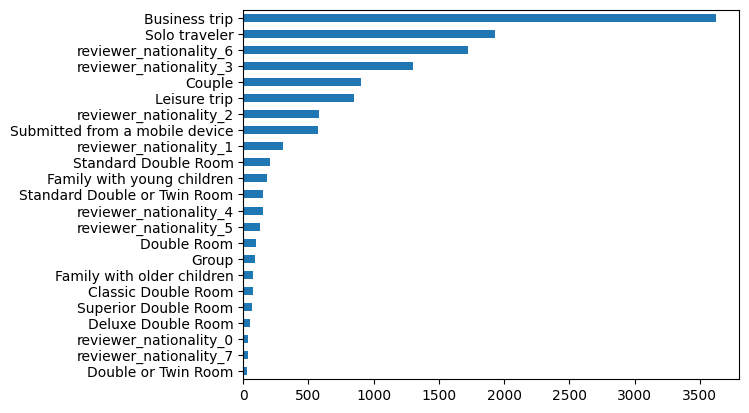

In [53]:
y=y.astype('int')
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Удаляем признаки со значимостью менее 200

In [55]:
h1.drop(imp_cat[imp_cat < 200].index, axis=1, inplace=True)

Удаляем признак Leisure trip т.к. он менее значим, чем Business trip и сильно с ним коррелирует.

In [56]:
h1.drop(['Leisure trip'], axis=1, inplace=True)

Для оценки значимость непрерывных признаков используем тест ANOVA

<AxesSubplot: >

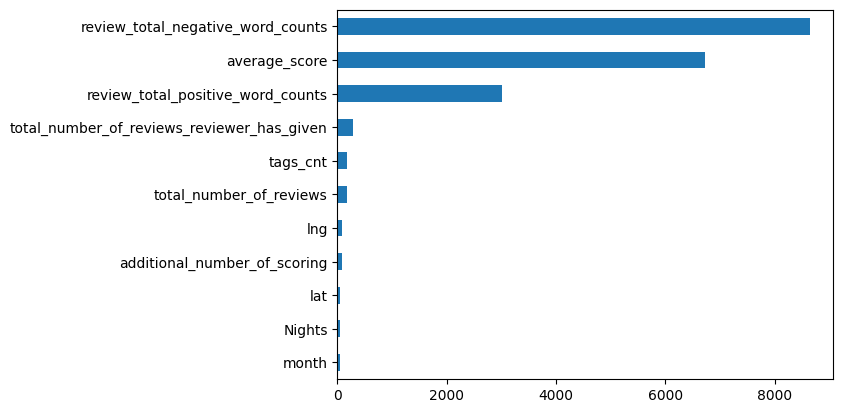

In [57]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [58]:
imp_num

month                                           52.415426
Nights                                          54.754426
lat                                             54.976104
additional_number_of_scoring                    75.035894
lng                                             80.127997
total_number_of_reviews                        167.933559
tags_cnt                                       172.085083
total_number_of_reviews_reviewer_has_given     275.957418
review_total_positive_word_counts             3009.314375
average_score                                 6717.495961
review_total_negative_word_counts             8642.348293
dtype: float64

Удаляем признаки со значимостью менее 200

In [59]:
h1.drop(imp_num[imp_num < 200].index, axis=1, inplace=True)
#imp_num[imp_num < 200].index

Удаляем из набора данных все объектные типы и дату

In [60]:
object_columns = [s for s in h1.columns if h1[s].dtypes in ['object','datetime64[ns]'] ]
h1.drop(object_columns, axis = 1, inplace=True)
#h1.info()
#object_columns

In [61]:
X = h1.drop(['reviewer_score'], axis = 1)  
y = h1['reviewer_score'] 

In [62]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [63]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [65]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1302311377509378
